<h1 align='center'>Final Project Purwadhika</h1>
<h1 align='center'>Telco Customer Churn Rate</h1>
<h4 align='center'>By Marsha Alexandra</h4>
<img src='customerchurn.jpeg'>



### Background
Customer churn refers to when customers (e.g. subscribers, users, players etc.) stop using certain company product or service. Companies typically label a customer as churned when a particular amount of time has elapsed since the customer’s last interaction with the site or service. In the telecom industry, the customers are labelled churned when they actively switch from one operator to another. Telecommucation companies experiences a wide range of 10-67% annual customer churn rate. This industry is highly competitive due to convenient nature of the service, allowing customers to choose and switch from multiple service providers and other probable factors such as better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.


### Goal
In a highly competitive market, increasing retention period of customers is a considerable concern within the telecommunication companies. The customer churn would require costs for lost revenue, marketing costs for attracting new potential customers, and additional costs for replacing the churned customers with the new ones. Therefore, predicting the customers who are likely to stop using the service will represent potentially large additional revenue source if it is done in the early phase. Thus it is an imperative need to create predictive machine learning model that could correctly predict the churned customer. The goals of exploration and machine learning model for this dataset are:
 1. To determine factors that accounts to customer churn 
 2. To predict if an individual customer will churn or not


### Dataset Columns Explanation
The dataset I choose contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.
#### Demographics:
- **customerID**: A unique ID that identifies each customer.
- **gender**: The customer’s gender (Male, Female).
- **SeniorCitizen**: Indicates if the customer is 65 or older (0 = No, 1 = Yes).
- **Partner**: Indicates if the customer has partner (Yes, No).
- **Dependents**: Indicates if the customer lives with any dependents (Yes, No). Dependents could be children, parents, grandparents, etc.

#### Services:
- **tenure** : Indicates the total amount of months that the customer has been with the company by the end of the quarter.
- **PhoneService** : Indicates if the customer subscribes to home phone service with the company (Yes, No).
- **MultipleLines** : Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No, No phone service).
- **InternetService**	: Indicates if the customer subscribes to Internet service with the company (No, DSL, Fiber optic).
- **OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No, No internet service).
- **OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No, No internet service).
- **DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No, No internet service).
- **TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No, No internet service).
- **StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, No internet service). The company does not charge an additional fee for this service.
- **StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, No internet service). The company does not charge an additional fee for this service.
- **Contract**: Indicates the customer’s current contract type (Month-to-month, One year, Two year).
- **PaperlessBilling** : Indicates if the customer has chosen paperless billing (Yes, No).
- **PaymentMethod**: Indicates how the customer pays their bill (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges**: Indicates the customer’s current total monthly charge for all their services from the company.
- **TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter.

#### Status:
- **Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company.


<center><h1 font-size='40px'>Exploratory Data Analysis</h1></center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Renaming some columns for better execution in subsequent analysis and machine learning building
df.rename(columns={"customerID": "CustomerID", "gender": "Gender","tenure": "Tenure"}, inplace = True)

In [6]:
#Changing type of TotalCharges and Tenure to float
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
df["Tenure"] = df['Tenure'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

>Missing values in column TotalCharges show up after changing the type to float. The missing values will be treated after EDA.

In [9]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.describe(exclude = 'number')

,CustomerID,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2722-JMONI,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [11]:
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique CustomerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique Gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique Tenure's count: 73
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechS

>Most of the features are categorical features, except Tenure, MonthlyCharges, and TotalCharges.

### Demographics EDA

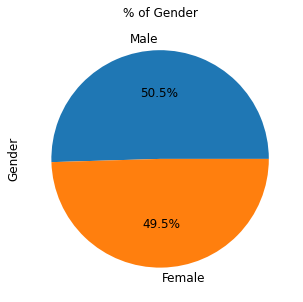

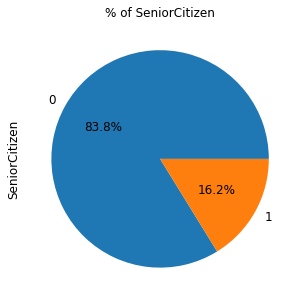

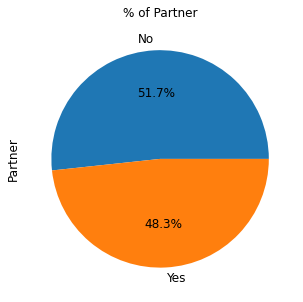

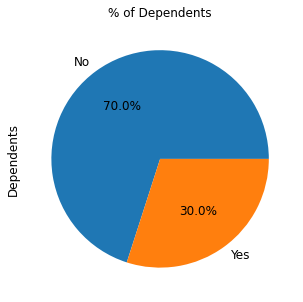

<Figure size 432x288 with 0 Axes>

In [26]:
demo_col = ['Gender','SeniorCitizen','Partner','Dependents']
for i in demo_col:
    temp = df[i].value_counts()
    label = temp.keys()
    ax = (df[i].value_counts()*100.0 /len(df))\
    .plot.pie(autopct='%.1f%%', labels = label,figsize =(5,5), fontsize = 12 )                                                                           
    ax.set_ylabel(f'{i}',fontsize = 12)
    ax.set_title('% of {}'.format(i), fontsize = 12)
    plt.show()

Demographics insights:
 - The gender distribution is balanced in this dataset. 
 - There are approximately 16.2% of senior citizens in the dataset. The dataset is dominated by younger people.
 - The ratio between customers who have partner and customers who do not have partners is also rather balanced.
 - Around 70% of customers within this dataset do not have dependents.

### Overall Churn Rate

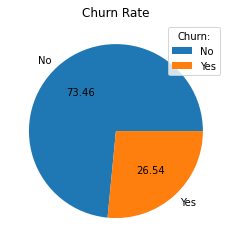

In [13]:
plt.pie(df['Churn'].value_counts(), labels = ['No','Yes'], autopct='%.2f')
plt.legend(title = "Churn:")
plt.title('Churn Rate')
plt.savefig('Churn Rate.png')

> The pie shows that the company experiences 26.54% churn rate. This pie also shows a class imbalance of the data between churners and non-churners. 

### Churn Rate based on Numerical Features

<AxesSubplot:ylabel='Density'>

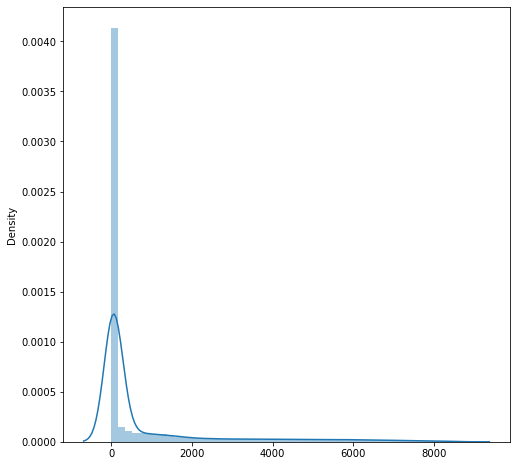

In [13]:
plt.figure(figsize =(8,8))
sns.distplot(df[['Tenure','MonthlyCharges','TotalCharges']])

> Data in numerical features are not normally distributed. To further exploration and analysis, nonparametric tests will be used. 

#### 1. Churn Rate in Tenure

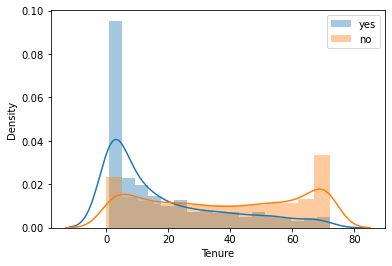

In [14]:
sns.distplot(df[df['Churn']=='Yes']['Tenure'],label='yes')
sns.distplot(df[df['Churn']=='No']['Tenure'],label='no')
plt.legend()
plt.savefig('Churn Rate Tenure1.png')

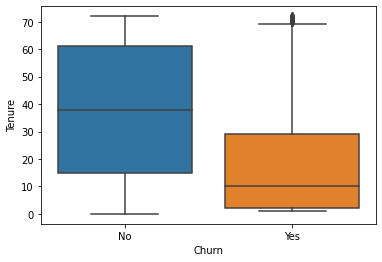

In [15]:
sns.boxplot(data=df,x='Churn',y='Tenure')
plt.savefig('Churn Rate Tenure2.png')

> From the visualizations above, churning customers have much lower tenure compared to non-churners. This was supported by boxplot visualization, where the median of tenure between churners vs non-churners are: approximately 10 months vs 40 months meaning churners mostly only use the services less than a year. In comparison, the non-churners mostly use the service for 3 years, 4x longer than the churners. This is a reasonable insights as longer tenure means customers are satisfied with services provided, thereby reducing probability of churning.

#### 2. Churn Rate in Monthly Charges

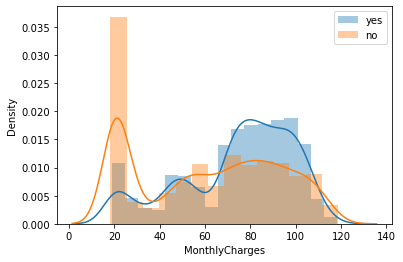

In [16]:
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'],label='yes')
sns.distplot(df[df['Churn']=='No']['MonthlyCharges'],label='no')
plt.legend()
plt.savefig('Churn Rate Monthly1.png')

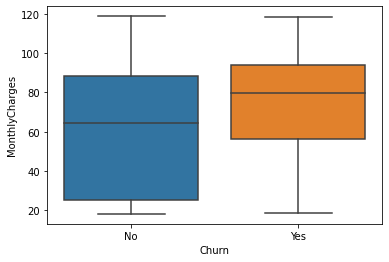

In [17]:
sns.boxplot(data=df,x='Churn',y='MonthlyCharges')
plt.savefig('Churn Rate Monthly2.png')

> From the visualizations above, churning customers have higher monthly charges compared to non-churners. In the boxplot visualization, we can see the median of monthly charges between churners vs non-churners equals to: approximately 80 USD vs 65 USD. This is also a reasonable insight as customers constantly look for good service with better price offers, therefore higher charges would make them keep looking for other service providers.

>Higher price would increase the churning rate. To further supporting this statement, I used nonparametric Mann-Whitney statistic test to prove the significance.

Mann-Whitney Test Hypothesis:
 - H0: No significant changes of monthly charges between churners and non-churners or monthly charges of churners are lower than non-churners
 - H1: Monthly charges of churners are significantly higher than non-churners

In [18]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(
    df[df['Churn']=='Yes']['MonthlyCharges'], 
    df[df['Churn']=='No']['MonthlyCharges'],
    alternative = 'greater'
))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: 6003125.5
P-Value: 1.6558138259942924e-54


>P-value is lower than 0.05, which means it rejects the null hypothesis. Monthly charges of churners are significantly higher than non-churners.

#### 3. Churn Rate in Total Charges

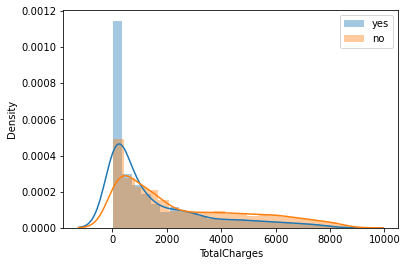

In [18]:
sns.distplot(df[df['Churn']=='Yes']['TotalCharges'],label='yes')
sns.distplot(df[df['Churn']=='No']['TotalCharges'],label='no')
plt.legend()
plt.savefig('Churn Rate Total1.png')

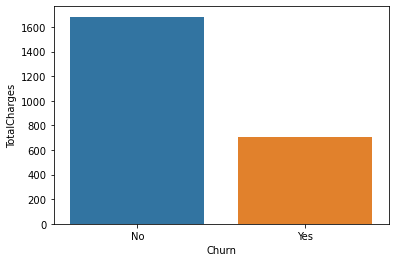

In [19]:
sns.barplot(y='TotalCharges', data=df, x= 'Churn',estimator=np.median,ci=0)
plt.savefig('Churn Rate Total2.png')

>Based on visualizations above, churning customers have lower amount total charges compared to non-churners. From the bar plot above, the median of total charges between churners vs non-churners equals to: approximately 700 USD vs 1600 USD. This is an interesting insight as churners have higher monthly charges, but lower total charges compared to non-churners. To further proving the gap significance, I used nonparametric Mann-Whitney statistic test.  

Mann-Whitney Test Hypothesis:
 - H0: No significant changes of total charges between churners and non-churners or total charges of churners are higher than non-churners
 - H1: Total charges of churners are significantly lower than non-churners

In [21]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(
    df[df['Churn']=='Yes']['TotalCharges'], 
    df[df['Churn']=='No']['TotalCharges'],
    alternative = 'less'
))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: 3360665.0
P-Value: 1.3950911430823563e-85


>P-value is lower than 0.05, which means it rejects the null hypothesis. Total charges of churners are significantly lower than non-churners. This means that the value of total charges in customers might not only come from the monthly charges only. Tenure might also become other factor that influences the total charges. To check the features correlation, I used heatmap with nonparametric Spearman method.

<AxesSubplot:>

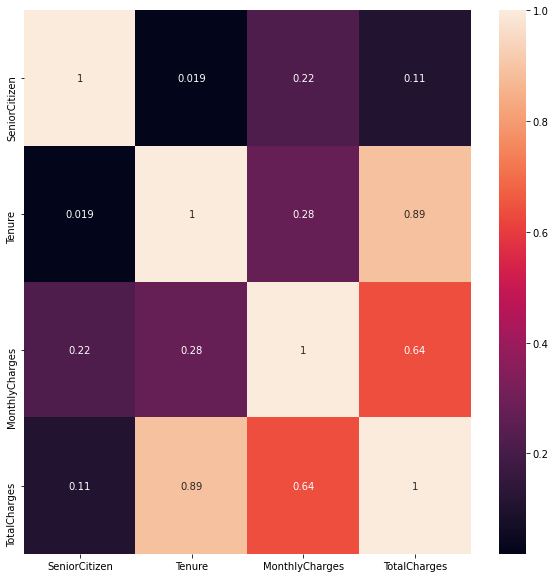

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr( method = 'spearman'), annot = True)

>From the visualization above, we can see that total charges are highly correlated with monthly charges (0.64) and tenure (0.89). The combination of tenure and monthly charges might result in the different amount of total charges in each customer which might cause the overall lower total charges in churners compared to non-churners. Looking at the definition of total charges, it is logical that total charges of churners is significantly lower. This is because the total charges are calculated at the end of the quarter. The churners will churn before the end of the quarter, therefore the charges calculated will be less than non-churner customers.   

### Churn Rate based on Categorical Features

<Figure size 2160x720 with 0 Axes>

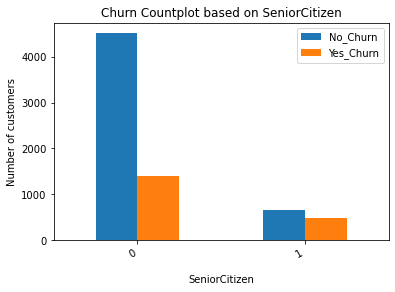

<Figure size 2160x720 with 0 Axes>

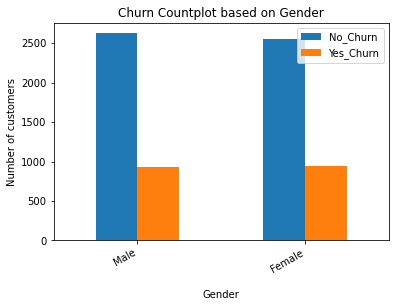

<Figure size 2160x720 with 0 Axes>

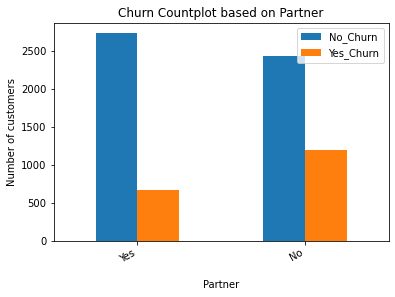

<Figure size 2160x720 with 0 Axes>

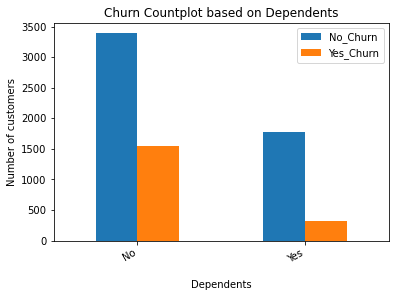

<Figure size 2160x720 with 0 Axes>

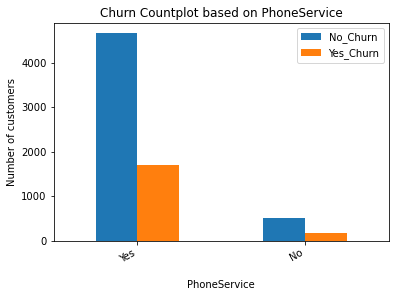

<Figure size 2160x720 with 0 Axes>

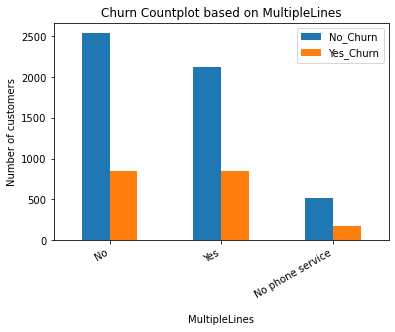

<Figure size 2160x720 with 0 Axes>

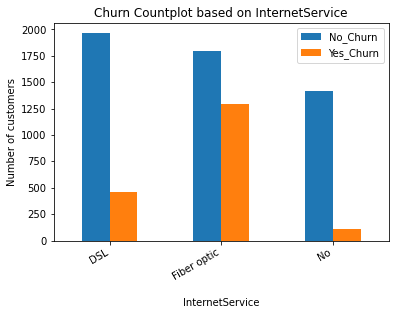

<Figure size 2160x720 with 0 Axes>

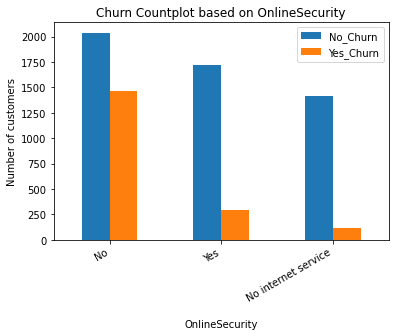

<Figure size 2160x720 with 0 Axes>

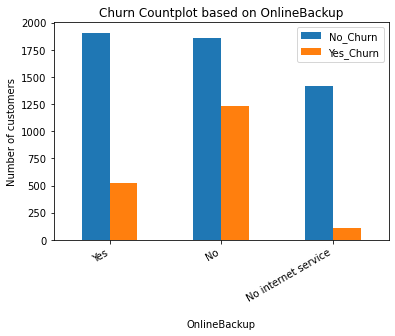

<Figure size 2160x720 with 0 Axes>

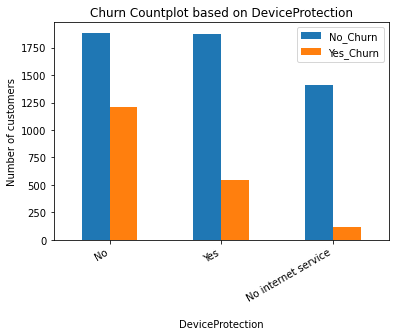

<Figure size 2160x720 with 0 Axes>

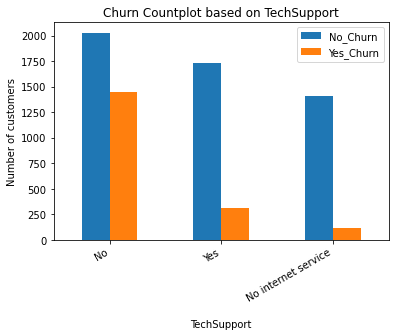

<Figure size 2160x720 with 0 Axes>

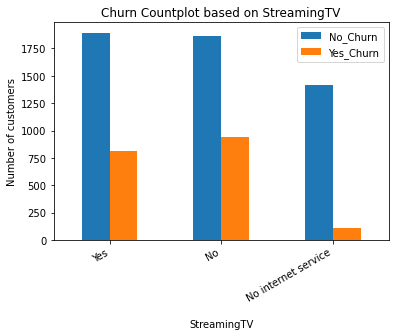

<Figure size 2160x720 with 0 Axes>

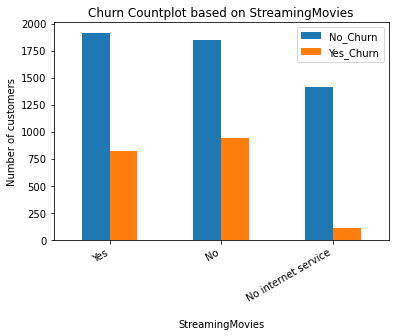

<Figure size 2160x720 with 0 Axes>

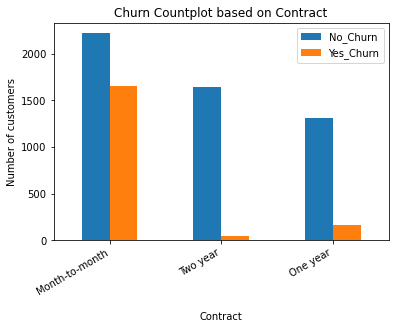

<Figure size 2160x720 with 0 Axes>

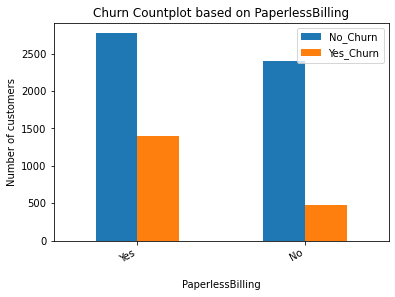

<Figure size 2160x720 with 0 Axes>

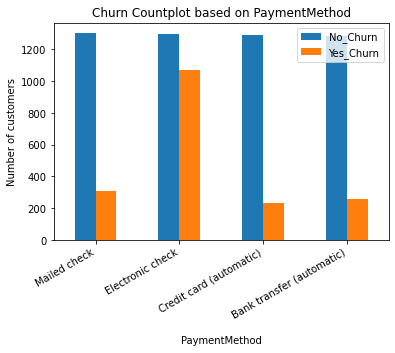

<Figure size 432x288 with 0 Axes>

In [43]:
def plot_bar(column):
    plt.figure(figsize = (30,10))
    temp_1 = pd.DataFrame()
    temp_1['No_Churn'] = df[df['Churn']== 'No'][column].value_counts()
    temp_1['Yes_Churn'] = df[df['Churn']== 'Yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'\n{column}')
    plt.xticks(rotation=30, ha = 'right')
    plt.ylabel('Number of customers')
    plt.title('Churn Countplot based on {}'.format(column))
    plt.show()
    
obj = ['SeniorCitizen','Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for i in obj:
    plot_bar(i)

In [21]:
obj = ['SeniorCitizen','Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for i in obj:
    target = df[df['Churn'] == 'Yes'][i]

    target_column = target.value_counts()/df[i].value_counts()*100
    print('Churn Rate based on {}'.format(i))
    print(f'{target_column.sort_values(ascending = False)}\n')

Churn Rate based on SeniorCitizen
1    41.681261
0    23.606168
Name: SeniorCitizen, dtype: float64

Churn Rate based on Gender
Female    26.920872
Male      26.160338
Name: Gender, dtype: float64

Churn Rate based on Partner
No     32.957979
Yes    19.664903
Name: Partner, dtype: float64

Churn Rate based on Dependents
No     31.279140
Yes    15.450237
Name: Dependents, dtype: float64

Churn Rate based on PhoneService
Yes    26.709637
No     24.926686
Name: PhoneService, dtype: float64

Churn Rate based on MultipleLines
Yes                 28.609896
No                  25.044248
No phone service    24.926686
Name: MultipleLines, dtype: float64

Churn Rate based on InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: InternetService, dtype: float64

Churn Rate based on OnlineSecurity
No                     41.766724
Yes                    14.611194
No internet service     7.404980
Name: OnlineSecurity, dtype: float64

Churn Rate based on Onli

Categorical features insights:
   - Senior citizens churn rate is much higher (41.6%; almost 2x higher) than non-senior churn rate (23.6%). We have to look deeper on which factors that caused high churn rate in seniors.
   - Male and female customers have similar churning rate (26.9% and 26.1%). This means gender does not play essential role in predicting customer churn rate.
   - Customers without partners have higher churn rate (32.9%) compared to customers with partner (19.7%). Similarly, customers without dependents also have 2x higher churn rate (31.3%) compared to customers with dependents (15.4%). This indicates that once a customer settles with partner or families, they also would less likely to churn on services.
   - Customers who subscribe to PhoneService (26.7%) and MultipleLines (28.6%) have slightly higher churn rates compared customers who do not subscribe to each respective service (24.9% & 25%). However, the significance of PhoneService and MultipleLines in predicting customer churn rate might be negligible since the churn rates are pretty similar.
   - Customers with InternetService fiber optic as part of their contract have much higher churn rate (41.9%). Customers with DSL (18.9%) are less probable to churn. Even though DSL has slower connection speed than fiber optic, using fiber optic might have more connection problems therefore the customers using fiber optic service are more likely to churn. 
   - Customers who do not subscribe to OnlineSecurity (41.7%), OnlineBackup (39.9%), DeviceProtection (39.1%), and TechSupport (41.6%) have moderately higher churn rate compared to customers who subscribe to each respective service (14.6%, 21.5%, 22.5%, & 15.1%).
   - Customers who do not use their internet service to stream TV program (33.5%) and movie (33.6%) have slightly higher churn rate compared to customers who stream each respective service (30% & 29.9%). However, the churn rates are pretty similar so the differences are negligible. Since the company does not charge additional fee for streaming services, it does not matter whether the customers use streaming services or not thereby resulting a similar churn rate. Based on this analysis, streaming service might not be predictive in churn rate prediction.  
   - Customers who do not subscribe to the internet service have very low churn rate (7.4%), meaning they only use the home phone service. Therefore, it can be assumed that most of the churn rate came from the internet and its additional services. It is interesting to see that customers who only use internet service have high churn rate, however when the customers have internet service and its additional service, they are less likely to churn. They might be satisfied with the additional services provided by the company.
   - Churn rate for month-to-month contracts much higher (42.7%) that for other contract durations (one-year = 11.3% & two-year = 2.8%). This is reasonable, as shorter contract duration makes it easier for customers to stop using the service. Furthermore, longer contract duration probably have contractual fines and therefore customers have to wait untill the end of contract to churn. 
   - Customers who use paperless billing have 2x higher churn rate (33.6%) compared to customers who use paper billing (16.3%). Some customer prefer to use paper billing, such as elderly people because they might be more familiar with it. Therefore, they might churn when they discover the paperless billing method used in the company.
   - Payment method using electronic check shows much higher churn rate (45.3%) than other payment methods ((mailed-check = 19.1%, bank transfer = 16.7%, & credit card = 15.24%). Senior citizens would prefer mailed check and younger people would prefer using autopay from bank transfer and credit card rather than e-check.


### Further Insights

#### Churn Rate Based on Number of Services (Phone and Internet Services)

> I want to know whether the number of services a customer subscribes to would contribute to churn decision. I made a new feature that sums all services that the customers subscribe, including phone and internet service along with all of their additional services.

In [22]:
df['internet'] = np.where(df.InternetService != 'No', 'Yes', 'No')
df['num_services'] = (df[['PhoneService','MultipleLines','OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection', 
                                      'TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'internet']] == 'Yes').sum(axis=1)

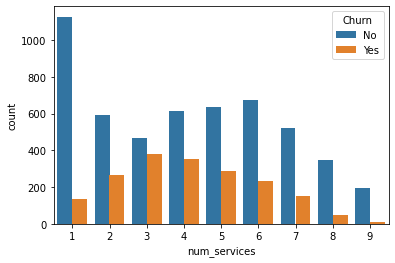

In [23]:
sns.countplot(df['num_services'],hue=df['Churn'])
plt.savefig('Churn Rate num_service.png')

In [24]:
target = df[df['Churn'] == 'Yes']['num_services']

target.value_counts()/df['num_services'].value_counts()*100

1    10.917722
2    30.966240
3    44.917258
4    36.476684
5    31.344902
6    25.550661
7    22.485207
8    12.405063
9     5.288462
Name: num_services, dtype: float64

> Based on the visualization above, customers who have 2-5 services are inclined to churn. The highest churn rate observed to customers who have subscribed to 3 services. I will focus on the number of internet services, especially the paid ones since phone services and streaming services resulted in similar churn rates in each of their categories.


#### Churn Rate Based on Internet and Its Paid Additional Services 

In [49]:
df['inet_services'] = (df[['OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','internet']] == 'Yes').sum(axis=1)

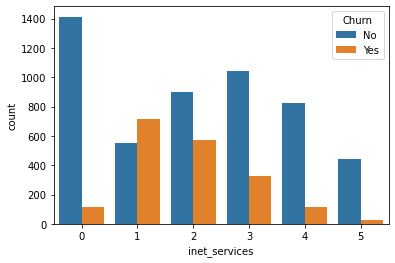

In [50]:
sns.countplot(df['inet_services'],hue=df['Churn'])
plt.savefig('Churn Rate inet_service.png')

In [51]:
target = df[df['Churn'] == 'Yes']['inet_services']

target.value_counts()/df['inet_services'].value_counts()*100

0     7.404980
1    56.669298
2    38.854806
3    23.760933
4    12.433581
5     5.319149
Name: inet_services, dtype: float64

>Based on the visualization above, the highest churn rate observed when customers using only the internet service (56.6%) or internet service with 1 additional service (38.8%). When customers subscribe to 2 or more additional services, they are less likely to churn, implying they are already satisfied with the internet and its additional services provided. It can be assumed that the main internet service is most likely the root cause of customer churn.

#### Senior Citizen High Churn Rate Factors

There are approximately 16.2% of senior citizens in the dataset. However, the churn rate within senior citizens reach 41.6%. I want to check which factors in the dataset that could contribute to high churn rate in senior citizens.

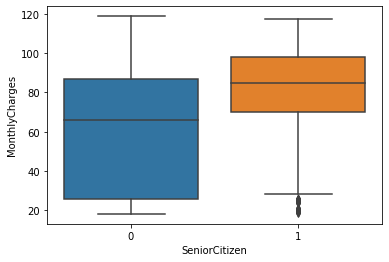

In [47]:
sns.boxplot(data=df,x='SeniorCitizen',y='MonthlyCharges')
plt.savefig('senior_month.png')

> Senior citizens have higher monthly charges compared to non-senior. The higher monthly charges is caused by the number of services they use.

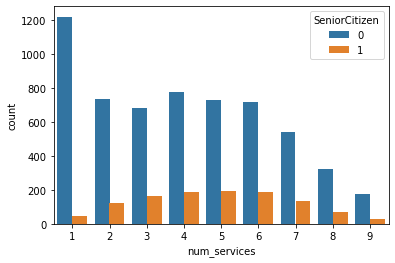

In [48]:
sns.countplot(df['num_services'],hue=df['SeniorCitizen'])
plt.savefig('senior_service.png')

In [54]:
target = df[df['SeniorCitizen'] == 1]['num_services']

target.value_counts()/df['num_services'].value_counts()*100

1     3.639241
2    14.435390
3    19.148936
4    19.481865
5    20.932755
6    20.925110
7    20.118343
8    18.227848
9    14.903846
Name: num_services, dtype: float64

> Based on visualization above, senior citizens have similar distributions in subscribing more than 1 service. The high monthly charges is probably due to accumulation of services subscribed by senior citizen customers. The high monthly charges could contribute to seniors churning. Besides factors in the dataset, I would speculate that the high churn rate in senior citizens would be driven by various factors, such as death, lack of use caused by deterioration of bodily function and diseases, or inability to adapt with operating systems and services.

### Summary

In this dataset, the customer churn rate might be influenced by several factors. Demographically, customers are likely to churn if they are senior citizens or if they are living alone. The customer also are likely to churn when they use month-to-month contract and are estimated to churn after around 10-months. Looking at the main services the company provides (home-phone and internet), the customers are likely to churn when they subscribe to the internet service, especially the fiber-optic one. However, the customers who use 2 or more its paid additional services are satisfied with the internet service and are loyal customers. From billing and payment aspects, the customers are likely to churn when their monthly charges are around 80 USD and if they are billed through paperless billing, especially electronic check. It is to be noted that the attributes mentioned above might influence each other or have more influences on the churn rate compared to the others. There is also external factors besides the dataset features that could influence the customer churn rate.

### Suggestions for the Company:

 1. The company should build machine learning model that could correctly predict the churned customers to avoid revenue loss early on the phase based on the data obtained.
 2. The company should also focus on improving the services, especially the main internet services. The company has to evaluate the issues within the internet service which cause high churn rate (e.g. connection problem, price strategy, or customer service).
 3. Through exploratory data analysis and machine learning model, the company can obtain customer profile who are likely to churn and who are likely to stay. Future marketing and promotion strategy could be directed to audiences who fit customer profile who are likely to stay, therefore minimizing unnecessary costs.


#### Note: Preprocessing Scheme for this dataset is done on 'Final Project Model.ipynb' 